# Data analysis: Bike rides in the San Francisco bike-sharing system

## Investigation Overview

I analysed the dataset associated with the San Francisco bike-sharing system. I investigated when most of the bike rides were made (both the day of the week and the time of day) and what variables correlated with how long bike rides took.

## Dataset Overview

The data consisted of the attributes of 174,881 bike rides made in February of 2019. These attributes included the start and end stations, the start and end times, the type of user and the duration of the bike ride. 8531 data points were removed from the analysis because of missing values and incorrect ages.

In [1]:
# import all packages and set plots to be embedded inline
from datetime import date
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
default_color = sb.color_palette()[0] # Set default colour for plots
fontsize = 16
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# A convenient way of obtaining the days of the week
DAYS_OF_WEEK = [calendar.day_name[day] for day in np.arange(0, 7)]
WEEKDAYS = DAYS_OF_WEEK[0:5]
WEEKEND = DAYS_OF_WEEK[5:]

# load in the dataset into a pandas dataframe
df = pd.read_csv('..\\..\\data\\201902-fordgobike-tripdata.csv')

In [3]:
# Remove null values.         
df = df[~df['member_birth_year'].isnull()] # This also happens to take care of null values in member_gender.
df = df[~df['start_station_id'].isnull()] # This also happens to take care of null values in start_station_name.

# Set to correct data types
df['member_birth_year'] = df['member_birth_year'].astype('int')
df['start_station_id'] = df['start_station_id'].astype('int')
df['end_station_id'] = df['end_station_id'].astype('int')
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Fix birth_years
df.loc[df[df.member_birth_year == 1878].index,'member_birth_year'] = 1978 # Fix the incorrect 1878 year
df = (df[~(df['member_birth_year'].isin([1900,1901,1902,1910]))]).reset_index(drop = True)
total_rides = df.shape[0]
total_rides

174881

In [4]:
# As we will be looking at the day of the week, it is worthwhile making a separate column to store that variable.
df['start_day'] = [calendar.day_name[start.weekday()] for start in df.start_time]
df['end_day'] = [calendar.day_name[end.weekday()] for end in df.end_time]

# convert start_day & end_day into ordered categorical types
ordinal_var_dict = {'start_day': [calendar.day_name[day] for day in np.arange(0, 7)],
                    'end_day': [calendar.day_name[day] for day in np.arange(0, 7)],}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)
    
# We want a member age as well as birth year
df['member_age'] = 2019 - df.member_birth_year 

## Data structure

The members were 75% male, 23% female and 2% other.

91% were subscribers; 9% were customers.

The median age of members is 32.

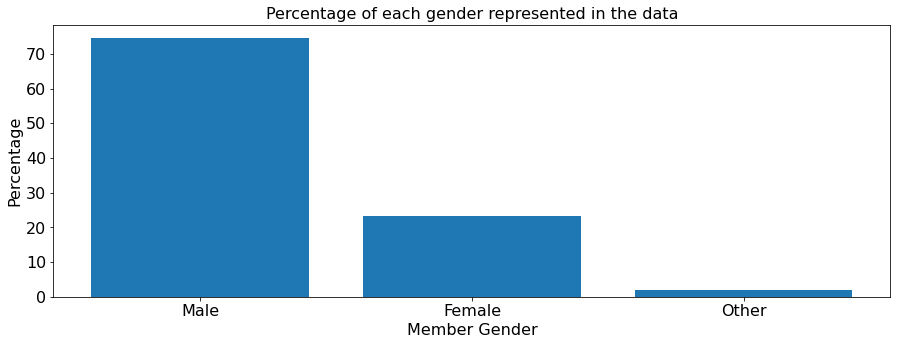

The members were 75% male, 23% female and 2% other.


In [5]:
plt.figure(figsize = (15,5))
plt.bar(df.member_gender.value_counts().index, height = 100*df.member_gender.value_counts()/total_rides);
#print(100*df.member_gender.value_counts()/total_rides)
plt.xlabel('Member Gender', fontsize = fontsize)
plt.ylabel('Percentage', fontsize = fontsize);
plt.xticks(fontsize = fontsize); plt.yticks(fontsize = fontsize)
plt.title('Percentage of each gender represented in the data', fontsize = fontsize);
plt.show()
print("The members were 75% male, 23% female and 2% other.")

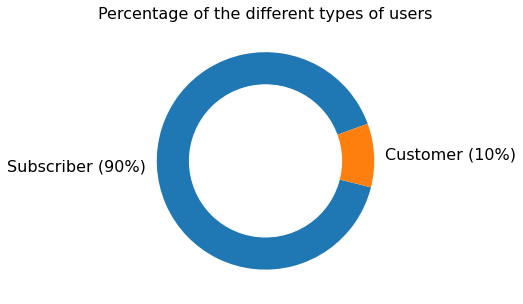

In [6]:
plt.figure(figsize = (15,5))
plt.pie(df.user_type.value_counts(), labels = ["Subscriber (90%)", "Customer (10%)"], startangle = 20, textprops = {"fontsize" : fontsize});
# https://www.python-graph-gallery.com/donut-plot/
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percentage of the different types of users', fontsize = fontsize);

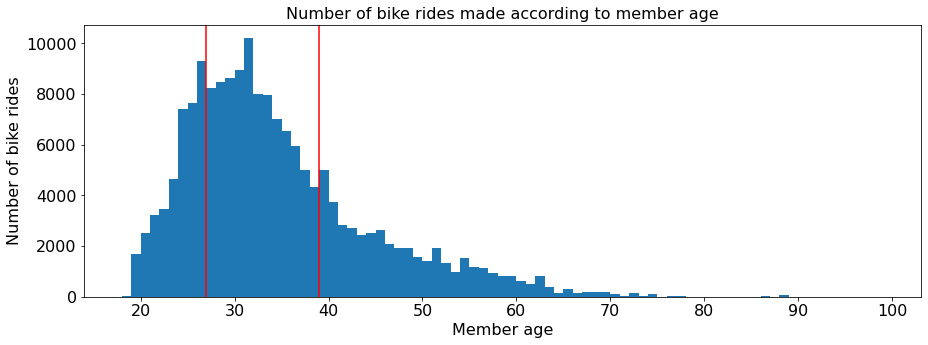

50% of the riders are aged between 27 and 39.


In [7]:
binsize = 1; bins = np.arange(df['member_age'].describe()['min'], df['member_age'].describe()['max']+binsize, binsize)
plt.figure(figsize=[15, 5])
plt.hist(data = df, x = 'member_age', bins = bins)
plt.axvline(27, color = 'red')
plt.axvline(39, color = 'red')
plt.xlabel('Member age', fontsize = fontsize)
plt.ylabel('Number of bike rides', fontsize = fontsize)
plt.xticks(fontsize = fontsize); plt.yticks(fontsize = fontsize)
plt.title('Number of bike rides made according to member age', fontsize = fontsize)
plt.show()
print("50% of the riders are aged between 27 and 39.")

## Distribution of ride days and times

Compared to a weekday, there were were >50% fewer rides made on Saturday or Sunday. 

The time of day shows a bimodal distribution, with the most rides being taken during commuting hours. 

In [8]:
fontsize = 14
blue = sb.color_palette()[0]; red = sb.color_palette()[3]
my_pal = {"Saturday": red, "Sunday": red, 
          "Monday": blue, "Thursday": blue, 
          "Friday": blue, "Wednesday": blue, "Tuesday": blue}

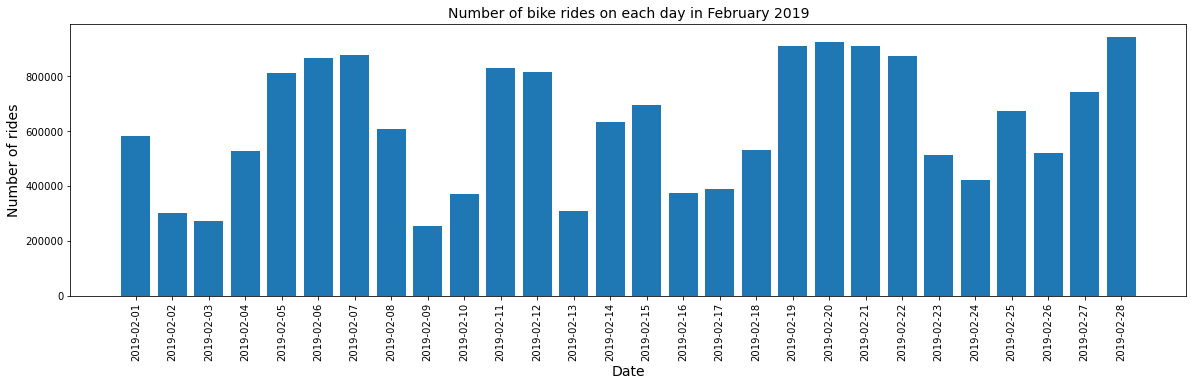

In [9]:
to_plot = pd.Series([start.date() for start in df.start_time])
plt.figure(figsize = (20,5))
plt.bar(to_plot.value_counts().index, height = 100*to_plot.value_counts()); #/total_rides
plt.xticks(to_plot.value_counts().index, rotation = 90);
plt.title('Number of bike rides on each day in February 2019', fontsize = fontsize)
plt.ylabel('Number of rides', fontsize = fontsize);
plt.xlabel('Date', fontsize = fontsize);
plt.show()

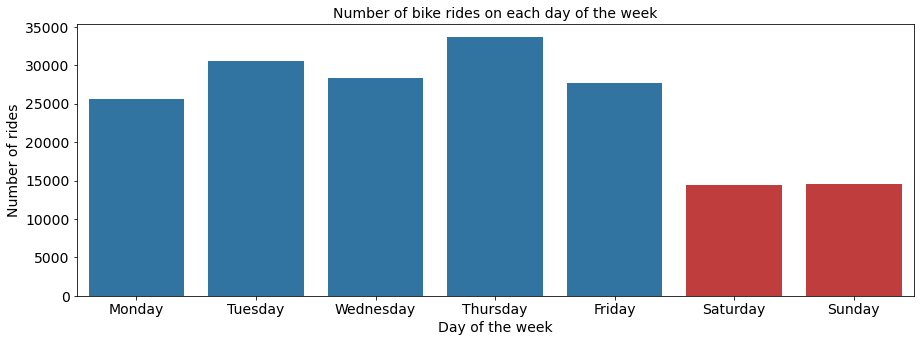

There were were >50% fewer rides made on Saturday or Sunday.
For example, 19% for Thursday vs. 8% for a Saturday.


In [10]:
# Let's plot the counts for each day of the week.
plt.figure(figsize = (15,5))
sb.countplot(data = df, x = 'start_day', palette = my_pal, order= [calendar.day_name[day] for day in np.arange(0, 7)]);
plt.title('Number of bike rides on each day of the week', fontsize = fontsize)
plt.xticks(fontsize = fontsize); plt.yticks(fontsize = fontsize)
plt.ylabel('Number of rides', fontsize = fontsize);
plt.xlabel('Day of the week', fontsize = fontsize);
plt.show()
print("There were were >50% fewer rides made on Saturday or Sunday.")
print("For example, 19% for Thursday vs. 8% for a Saturday.")

In [11]:
# Let's have a look at the 30 minute resolutions
dfcopy = df.copy()
dfcopy.set_index('start_time', inplace=True) 
df_resample = dfcopy.resample('30min').count()
df_resample.reset_index(inplace = True)
df_resample['start_time'] = [ val.time() for val in df_resample['start_time'] ]

to_plot = pd.DataFrame(df_resample.groupby('start_time').sum()['start_station_id'])
to_plot.rename(columns = {'start_station_id' : 'number_of_trips'}, inplace = True)
to_plot.reset_index(inplace = True)
total_trips = to_plot.number_of_trips.sum()

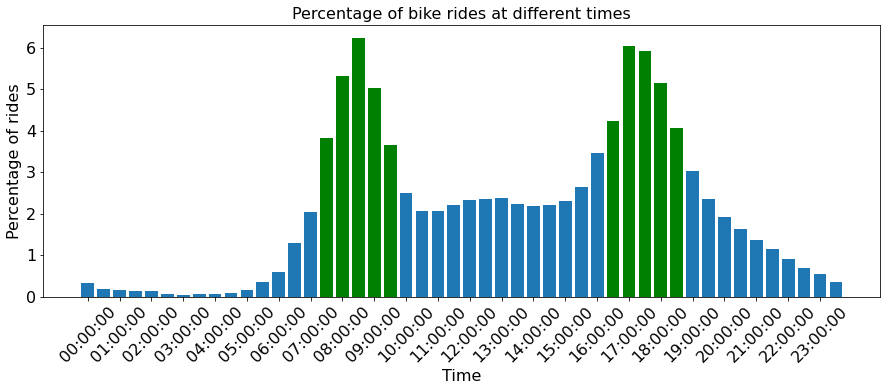

The highest usages were between 7:30 a.m.⁠ – ⁠09:30 a.m. and 4:30 p.m.⁠ – ⁠06:30 p.m.


In [12]:
plt.figure(figsize = (15,5))
plt.bar(to_plot.index, 100*to_plot.number_of_trips/total_trips)
start = 15; end = 20
plt.bar(to_plot.index[start:end], 100*to_plot.number_of_trips[start:end]/total_trips, color = 'green')
start = 33; end = 38
plt.bar(to_plot.index[start:end], 100*to_plot.number_of_trips[start:end]/total_trips, color = 'green')
plt.xticks(to_plot.index[::2], to_plot.start_time[::2], rotation = 45, fontsize = 16);
plt.yticks(fontsize = 16);
plt.ylabel('Percentage of rides', fontsize = 16);
plt.xlabel('Time', fontsize = 16);
plt.title('Percentage of bike rides at different times', fontsize = 16);
plt.show()
print("The highest usages were between 7:30 a.m.⁠ – ⁠09:30 a.m. and 4:30 p.m.⁠ – ⁠06:30 p.m.")

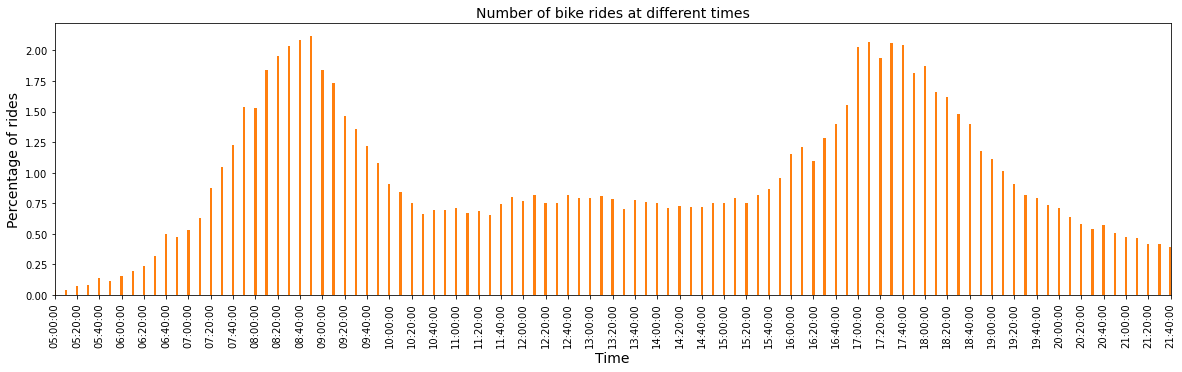

In [13]:
# Let's have a look at the 10 minute resolutions
df_resample = dfcopy.resample('10min').count()
df_resample.reset_index(inplace = True)
df_resample['start_time'] = [ val.time() for val in df_resample['start_time'] ]
to_plot = pd.DataFrame(df_resample.groupby('start_time').sum()['start_station_id'])
to_plot.rename(columns = {'start_station_id' : 'number_of_trips'}, inplace = True)
to_plot.reset_index(inplace = True)
total_trips = to_plot.number_of_trips.sum()
plt.figure(figsize = (20,5))
plt.bar(to_plot.index, 100*to_plot.number_of_trips/total_trips, width = 0.2)
plt.bar(to_plot.index, 100*to_plot.number_of_trips/total_trips, width = 0.2)
skip = 2
plt.xticks(to_plot.index[::skip], to_plot.start_time[::skip], rotation = 90);
plt.xlim(30,130)
plt.title('Number of bike rides at different times', fontsize = fontsize)
plt.ylabel('Percentage of rides', fontsize = fontsize);
plt.xlabel('Time', fontsize = fontsize);

## Distribution of ride duration

The time duration of each ride took on a large range of values. Under a log transformation, we see that the median duration is roughly 10 minutes, that most trips were between a few minutes to under an hour, and that no trip took longer than a day.

In [14]:
MAX_DURATION = df['duration_sec'].max()
MIN_DURATION = df['duration_sec'].min()
display(df['duration_sec'].describe())

count    174881.000000
mean        704.026761
std        1642.511220
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

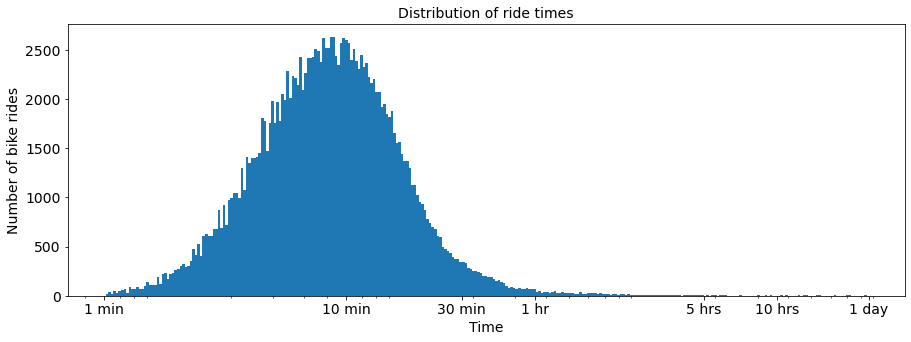

The median duration is roughly 10 minutes.
Most trips were between a few minutes to under an hour.
No trip took longer than a day.


In [15]:
# Use a log scale because of the long tail in the distribution
bins2 = np.logspace( np.log10(MIN_DURATION),  np.log10(MAX_DURATION), num=300)
#plt.figure(figsize=[8, 5])
plt.figure(figsize = (15,5))
plt.hist(data = df, x = 'duration_sec', bins = bins2)
plt.xscale('log')
plt.xticks([60, 600, 1800, 3600, 18000, 36000, 86400], ['1 min', '10 min', '30 min', '1 hr', '5 hrs', '10 hrs', '1 day']
          , fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.xlabel('Time', fontsize = fontsize)
plt.ylabel('Number of bike rides', fontsize = fontsize)
plt.title('Distribution of ride times', fontsize = fontsize)
plt.show()
print("The median duration is roughly 10 minutes.")
print("Most trips were between a few minutes to under an hour.")
print("No trip took longer than a day.")

## What are the ages of males/females who ride at the weekend/weekday?

For males and females at weekends (compared to weekdays):
- The median age is slightly lower
- Both the 25th and the 75th quartile are also at lower ages.

In [20]:
def rgb(r,g,b): 
    '''Normalises the rgb values so that they can be used by seaborn'''
    return ( (r/255), (g/255), (b/255)  )

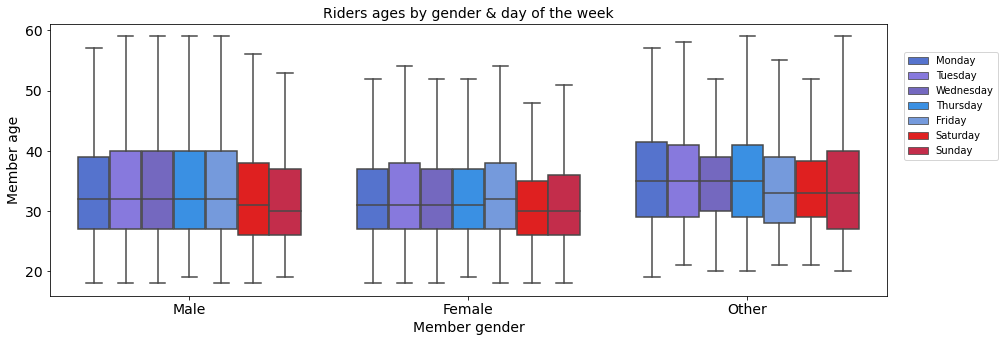

Note that the outliers have been removed; the box plots cover the interquartile range.


In [21]:
my_pal = {"Saturday": rgb(255,0,0), "Sunday": rgb(220,20,60), 
          "Monday": rgb(65,105,225), "Thursday": rgb(30,144,255), 
          "Friday": rgb(100,149,237), "Wednesday": rgb(106,90,205), "Tuesday": rgb(123,104,238)}
fig, ax1 = plt.subplots(figsize = (15,5))
sb.boxplot(data = df, hue = 'start_day', y = 'member_age', x = 'member_gender', showfliers=False, ax = ax1, palette = my_pal,
          order=['Male', 'Female', 'Other'])
plt.legend(loc = (1.02,0.5))
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.xlabel('Member gender', fontsize = fontsize)
plt.ylabel('Member age', fontsize = fontsize)
plt.title('Riders ages by gender & day of the week', fontsize = fontsize)
plt.show()
print("Note that the outliers have been removed; the box plots cover the interquartile range.")

## Distribution of rider ages & ride times according to the day of the week

At weekends (compared to weekdays):  
The median age is slightly lower  
Both the 25th and the 75th quartile are also at lower ages.  

The 75th quartile for ride duration time is slightly higher.

In [22]:
#print(100*len(df[df.duration_sec>3600])/len(df)) # Less than 1% are above one hour, so let's remove...
#print(100*len(df[df.member_age>60])/len(df)) # Less than 1% are above 60, so let's remove...
df_no_outliers = df[df.duration_sec<3600]
df_no_outliers = df_no_outliers[df_no_outliers.member_age<60]
df_no_outliers.rename(columns = {'member_age': 'Member age',
                      'duration_sec': 'Ride duration (seconds)',
                      'start_day': 'Day of the week'},
                      inplace = True)

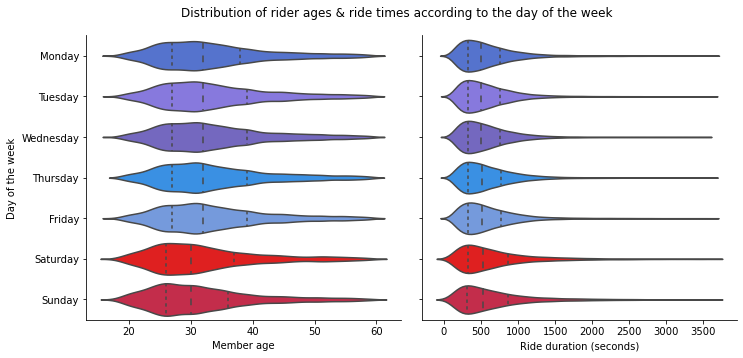

Again, the outliers have been removed and the box plots cover the interquartile range.


In [23]:
g = sb.PairGrid(data = df_no_outliers, x_vars = ['Member age', 'Ride duration (seconds)'], y_vars = ['Day of the week'], height = 5);
g.map(sb.violinplot, inner = 'quartile', palette= my_pal, fontsize = fontsize);
g.fig.subplots_adjust(top=0.9);
g.fig.suptitle('Distribution of rider ages & ride times according to the day of the week');
plt.show()
print("Again, the outliers have been removed and the box plots cover the interquartile range.")

## Are there any other differences between the weekdays and the weekends?

At weekends, there is a different distribution for the most used stations and the most used bikes.

Lastly, the bimodal distribution of start times disappears at the weekend.

In [24]:
df_extra = df.copy()
df_extra['start_hour'] = pd.Series([start.time().hour for start in df_extra.start_time])
df_extra.rename(columns = {'start_station_id': 'Start station ID',
                      'bike_id': 'Bike ID',
                      'start_day': 'Day of the week',
                      'start_hour': 'Starting hour for bike ride'},
                      inplace = True)

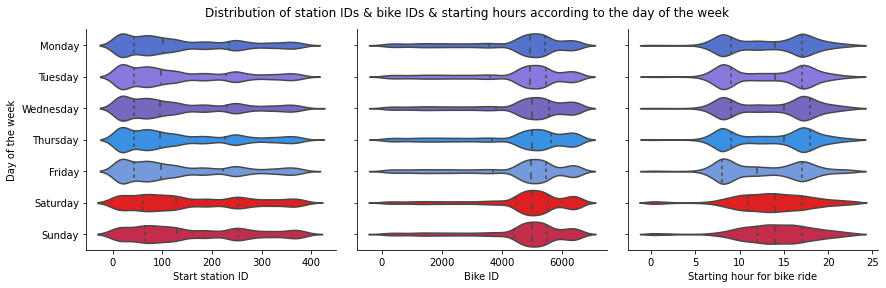

In [28]:
g = sb.PairGrid(data = df_extra, x_vars = ['Start station ID', 'Bike ID', 'Starting hour for bike ride'], y_vars = ['Day of the week'], height = 4);
g.map(sb.violinplot, inner = 'quartile', palette= my_pal, fontsize = fontsize);
g.fig.subplots_adjust(top=0.9);
g.fig.suptitle('Distribution of station IDs & bike IDs & starting hours according to the day of the week');
plt.show()

## Basic summary

- 174,881 bike rides were analysed.

- Median age of riders: 32. 75% of total were male.

- On the weekdays, commuting times were the busiest. 

- There were fewer rides at the weekend. 

- Median duration of each ride was roughly 10 minutes; most trips took a few minutes to under an hour.